In [6]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import pickle
import random

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15) 

In [2]:
file1 = open("qcd_100000_pt_1000_1200.pkl", 'rb')
data1 = pickle.load(file1)
file2 = open("higgs_100000_pt_1000_1200.pkl", 'rb')
data2 = pickle.load(file2)

## Problem 1
The first problem is to look at your background distribution and determine where the 5σ sensitivity threshold is. [Hint, you've done this several times now, look back at the first few labs.]

In [3]:
lam = 100
sigma = 5

bkgd = stats.poisson.rvs(100, 154)
signal = bkgd

probability = stats.norm.sf(sigma)
sigma = stats.norm.isf(probability)
print("The significance of a 154 jet signal is", sigma, "sigma.")

target_sigma = 5
new_prob = stats.norm.sf(target_sigma)
target_signal = stats.poisson.isf(new_prob, lam)
print("Jets needed for 5 sigma discovery:", target_signal)

probability = stats.poisson.sf(target_signal, lam)
sigma = stats.norm.isf(probability)
print("Sigma corresponding to", target_signal, ":" , sigma)

The significance of a 154 jet signal is 5.000000000000001 sigma.
Jets needed for 5 sigma discovery: 154.0
Sigma corresponding to 154.0 : 5.05750350583485


## Problem 2
Now inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30σ range. Inject this signal into your background data many times.

In [4]:
sigma = 8

probability = stats.norm.sf(sigma)
signal_new = stats.poisson.isf(probability, lam)  
print("Jets needed for 8 sigma discovery:", signal_new)

Jets needed for 8 sigma discovery: 190.0


a) Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.

Due to limitations of stats.poisson.isf, we're only able to find signals up to 8 sigma (all other values return not a number), so we will be working with an 8 sigma discovery.

This histogram shows us our background and the injected signal of 190. Because the injected signal is always 190, the range is centered on 190. It's not solely 190 due to the fact that the background is added and subtracted from this injected signal.
The semi-log plot of the distribution shows that they are both approximately Gaussian distributions, with symmetric backgrounds about 100, and the injected signal is symmetric about 290 (background+injected signal).

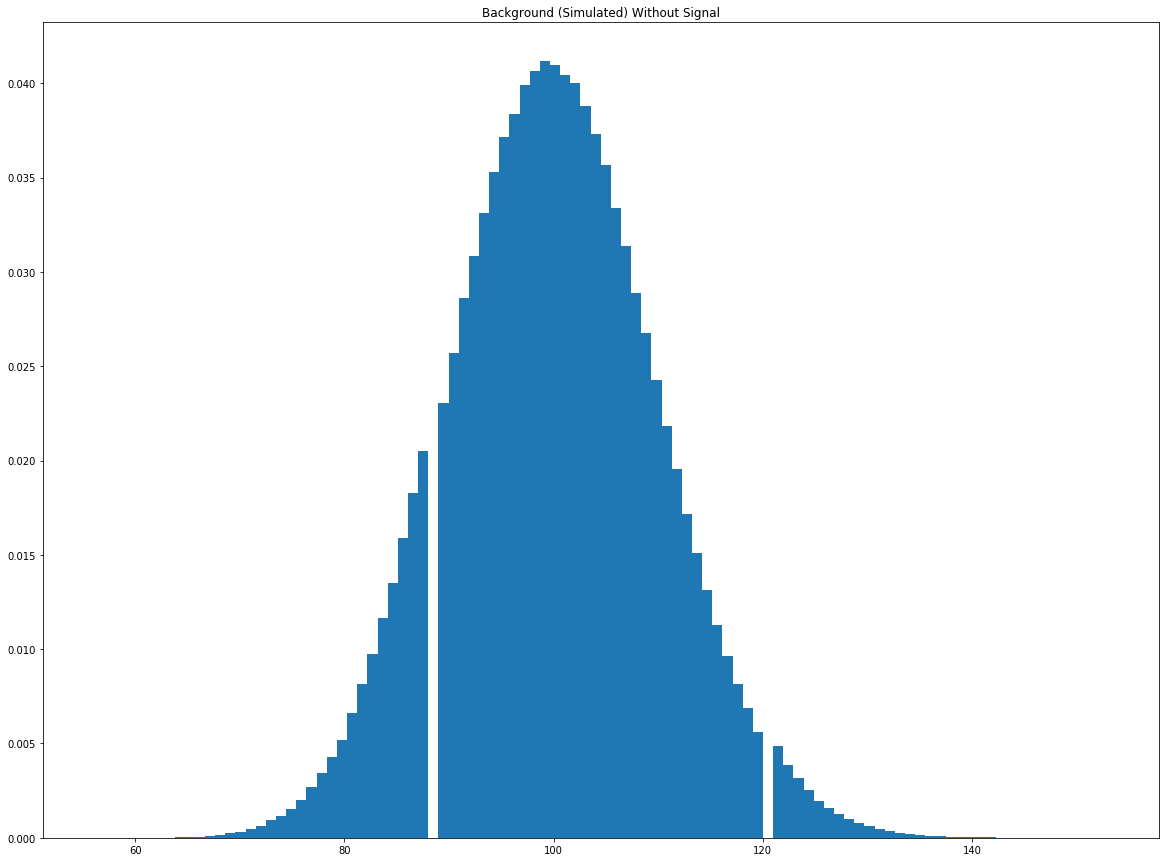

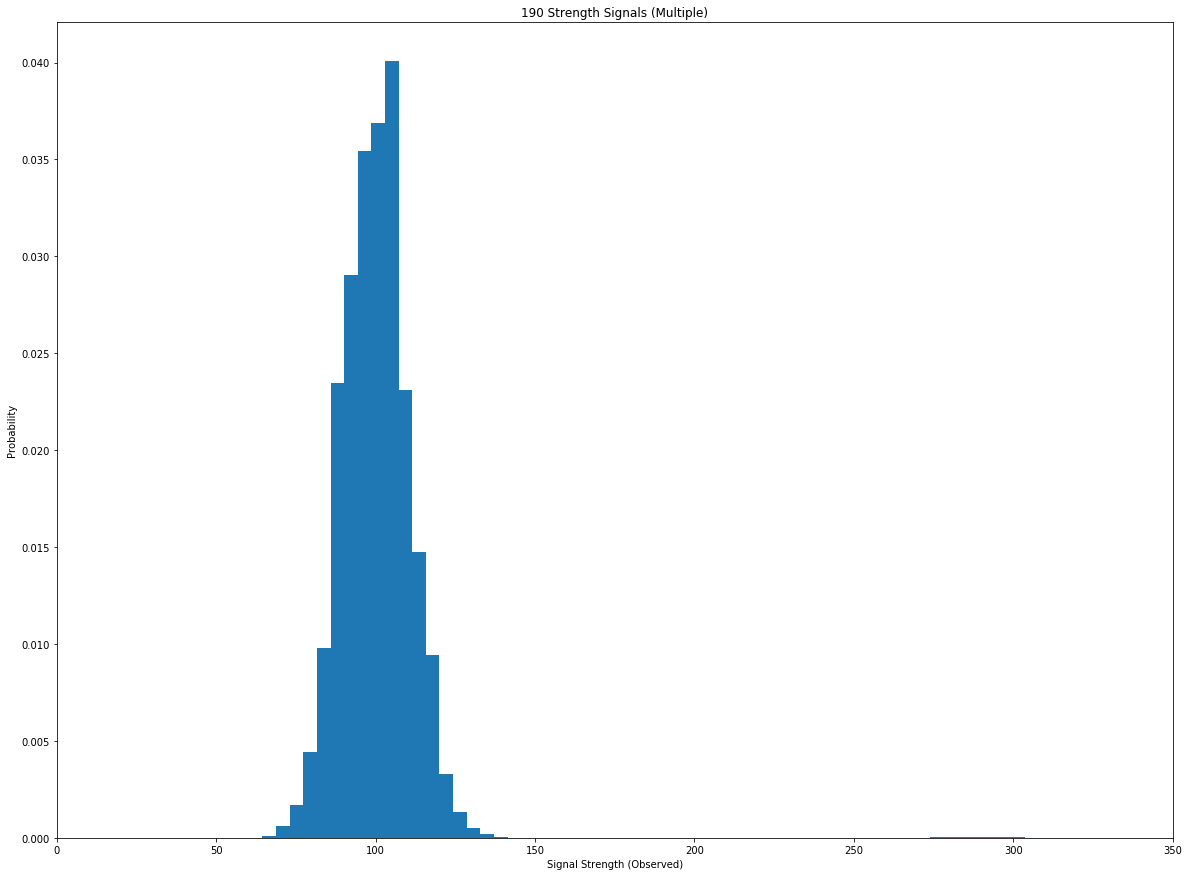

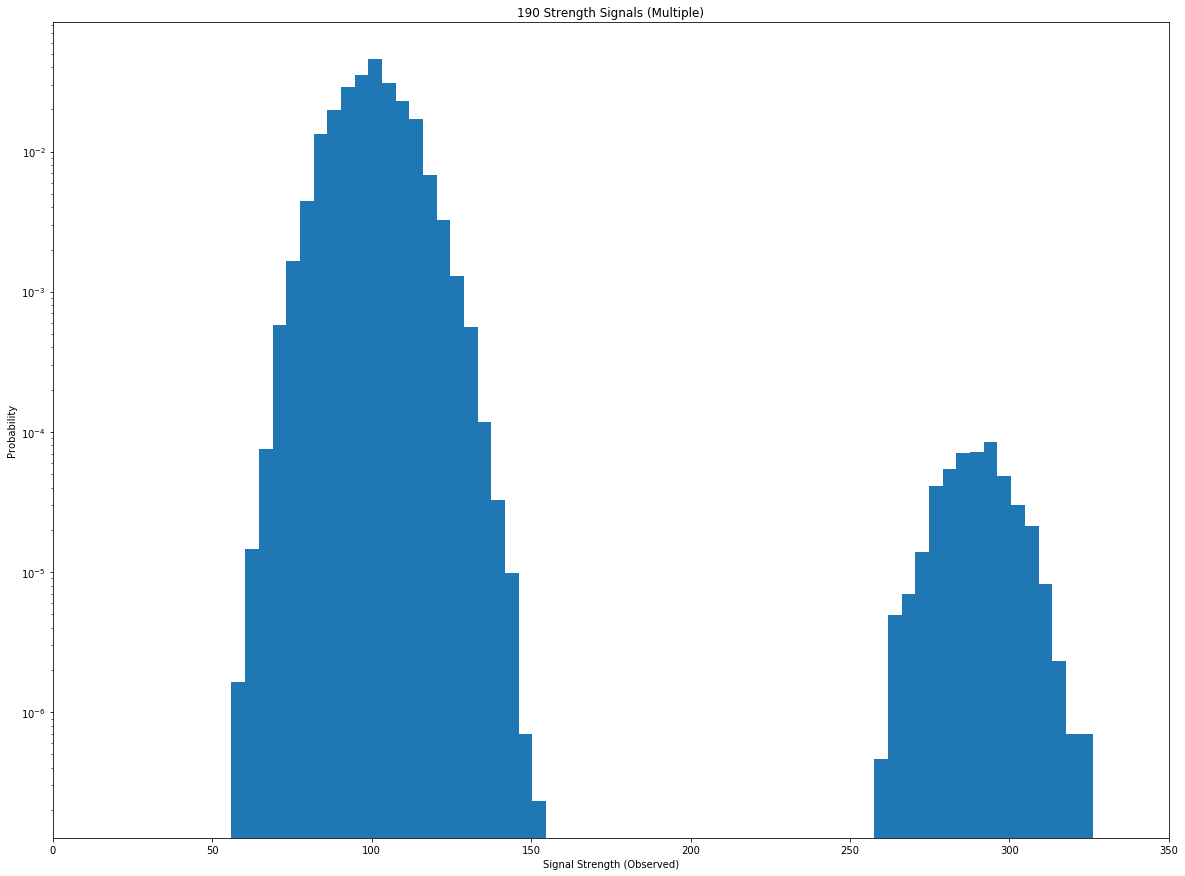

In [7]:
bkgd = stats.poisson.rvs(100, size = 1000000)
plt.hist(bkgd, density = True, bins = 100)
plt.title("Background (Simulated) Without Signal")
plt.show()

bkgd_signal = bkgd
for i in range(1000):
    index = random.randint(0, 100000)
    bkgd_signal[index] += 190
plt.hist(bkgd_signal, density = True, bins = 100)
plt.xlim([0, 350])
plt.title("190 Strength Signals (Multiple)")
plt.xlabel("Signal Strength (Observed)")
plt.ylabel("Probability")
plt.show()

new_bg_poisson = bkgd_signal  
for i in range(1000):
    index = random.randint(0, 100000)
    new_bg_poisson[index] += 190

plt.hist(new_bg_poisson, density = True, bins = 100)
plt.xlim([0, 350])
plt.yscale("log")
plt.title("190 Strength Signals (Multiple)")
plt.xlabel("Signal Strength (Observed)")
plt.ylabel("Probability")
plt.show()

b) Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?

The observed signal is not biased, and is symmetric. This means that it's equally likely to be stronger or weaker than the true injected signal. Based on the log plot, we can estimate this distribution to be Gaussian in nature about the injected signal, which aligns with what we know about the shape of the background. Because the only modification we made was the addition of a constant value to the background, we can expect the observed, injected signal to have a similar shape.

## Problem 3
Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above 5σ (30σ or more). You will want to follow the work you did for Homework 5 very closely.

In [8]:
probability = stats.poisson.sf(1000, 300)
sigma = stats.norm.isf(probability)
print("Sigma corresponding to", 300, ":" , sigma)

Sigma corresponding to 300 : 31.774720781417827


a) Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed data

We will be injecting signals between 0 and 32 sigma to achieve our target signal strength.

In [ ]:
bkgd = scipy.stats.poisson.rvs(100, loc=0, size=1000000)
signal = np.random.uniform(low=0.0, high=300, size=(1000000))
data = bkgd + signal

signaledges = np.linspace(0,300, 551)
dataedges = np.linspace(0, 650, 651)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters, Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 15)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 15)
plt.show()

b) For the same injected signal power as in problem 2, show that you get the same answer.

In [ ]:
bin_signal = np.digitize(190, signaledges) 
    
prob_data = Psd[:, bin_signal]

prob_data = prob_data*(1/np.sum(prob_data))

plt.stairs(prob_data, edges = dataedges, linewidth = 2)
plt.title(f'Probability of Observed Values of Strength 190', fontsize=15)
plt.tick_params(labelsize=15)
plt.ylabel('Probability P(d|s=190)', fontsize = 15)
plt.xlabel('Observed data', fontsize = 15)
plt.xlim([200,400])
plt.show()

c) Now reverse the problem, select an observed data value (pick something quite a bit stronger than 5σ) and create a 1D histogram of the true signal probability given the observed data. Describe the meaning of this histogram.

In [ ]:
probability2 = stats.poisson.sf(220, lam)
sigma2 = stats.norm.isf(probability2)
print('The significance of a 220 strength signal is ' , sigma2, 'sigma.')

obs_signal = 220
bin_obs = np.digitize(obs_signal, dataedges) - 1
prob_obs = Psd[bin_obs, :]

prob_obs1 = prob_obs*(1/(np.sum(prob_obs)))
print(np.sum(prob_data))

plt.stairs(prob_obs, edges = signaledges, linewidth = 2)
plt.title(f'Probability of True Signal, Given An Observed Value of 220', fontsize=15)
plt.tick_params(labelsize=15)
plt.ylabel('Probability P(s|d=220)', fontsize = 15)
plt.xlabel('True signal', fontsize = 15)
plt.xlim(50,200)
plt.show()

d) For your observed signal, what is the 1σ uncertainty on the true signal strength?

In [ ]:
prob = stats.norm.cdf(1)
print(prob - .5)

p=0.5
for i in range(prob_obs1.size):
    value=np.trapz(prob_obs1[:i])
    if value >= p:
        print('At 50% of the data we can find our mean to be: ', i)
        break
        
p=stats.norm.cdf(1)
for i in range(prob_obs1.size):
    signal_plus1 =np.trapz(prob_obs1[:i])
    if signal_plus1 >= p:
        print('For 1 sigma above our mean we havea signal of: ', i)
        break
        
p=stats.norm.cdf(-1)
for i in range(prob_obs1.size):
    value=np.trapz(prob_obs1[:i])
    if value >= p:
        print('For 1 sigma below our mean we have a signal of: ' , i)
        break

e) Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense?

First, in order to calculate the uncertainty range I had to find the mean since it may not be exactly at 120. I did this by finding which value corresponded to a probability of 50%. Then, by finding which signal corresponded to 15% of the data we found the signal 1 sigma below our true signal strength. Then we found the signal corresponding to 84% of the data which gave us the signal 1 sigma above the mean. The 1$\sigma$ value happened to be symmetric about the mean, which makes sense because our initial background was symmetric about its mean since we had near a Gaussian distribution due to the Central Limit Theorem.